In [1]:
import sys
print(sys.executable)
conda activate anaconda3
pip install wordcloud


SyntaxError: invalid syntax (2450241751.py, line 3)

In [1]:
import pandas as pd
pd.set_option('display.max_columns', None)  # Show all columns
pd.set_option('display.width', None)  # Adjust the width to display everything
pd.set_option('display.max_colwidth', None)  # Show full column content
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

ModuleNotFoundError: No module named 'wordcloud'

In [4]:
df = pd.read_csv('/Users/pcfic/Documents/Circle/DataCircle_Twitter_Project/twitter_cleaned_data.csv')
df.head()

,created_at,tweet_id,likes,retweet_count,source,user_id,user_join_date,user_followers_count,user_location,city,country,state,candidate,tweet_cleaned
0,2020-10-15 00:00:02,1316529228091846912,2,1,twitter web app,8436472,2007-08-26 05:56:11,1185,portland,portland,united states,oregon,trump,#trump student used hear years ten years heard china 2019 15 dont know many asked many said sir dont know millions like 300 million um
1,2020-10-15 00:00:02,1316529227471237120,0,0,trumpytweeter,828355589206056960,2017-02-05 21:32:17,32,unkown,unkown,unkown,unkown,trump,2 hours since last tweet #trump maybe busy tremendously busy
2,2020-10-15 00:00:08,1316529252301451264,4,3,twitter for iphone,47413798,2009-06-15 19:05:35,5393,washington dc,washington,united states,district of columbia,trump,get tie get tie #trump rally #iowa
3,2020-10-15 00:00:17,1316529291052675072,2,0,twitter for android,1138416104,2013-02-01 01:37:38,2363,"perris,california",unkown,united states,california,trump,clady62 15 minutes long time ago omarosa never represented black community #thereidout cried #trump begging job
4,2020-10-15 00:00:17,1316529289949569024,0,0,twitter for iphone,767401841030209536,2016-08-21 16:43:51,75,"powell, tn",unkown,unkown,unkown,trump,richardmarx glad u got house dick#trump 2020


In [5]:
# Function to calculate word frequency for each candidate
def  calculate_word_frequency(candidate):
    candidate_tweets = df[df['candidate'] == candidate]['tweet_cleaned']
    words = ' '.join(candidate_tweets).split()
    words = [word.lstrip('#') for word in words]
    word_freq = Counter(words)
    return word_freq

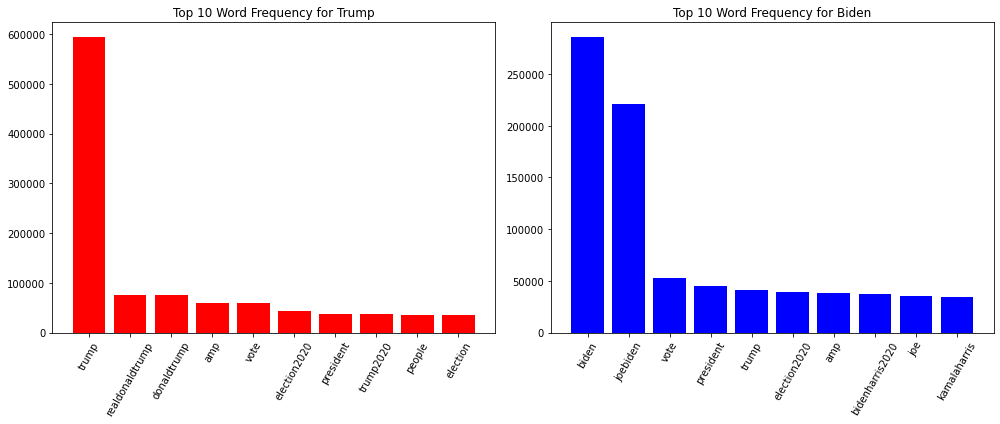

In [8]:
# Calculate word frequency for each candidate
trump_word_freq = calculate_word_frequency('trump')
biden_word_freq = calculate_word_frequency('biden')

trump_df = pd.DataFrame(trump_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)
biden_df = pd.DataFrame(biden_word_freq.items(), columns=['Word', 'Frequency']).sort_values(by='Frequency', ascending=False)

plt.figure(figsize=(14, 6))

# Trump word frequency
plt.subplot(1, 2, 1)
plt.bar(trump_df['Word'][:10], trump_df['Frequency'][:10], color='red')
plt.title('Top 10 Word Frequency for Trump')
plt.xticks(rotation=60)

# Biden word frequency
plt.subplot(1, 2, 2)
plt.bar(biden_df['Word'][:10], biden_df['Frequency'][:10], color='blue')
plt.title('Top 10 Word Frequency for Biden')
plt.xticks(rotation=60)

plt.tight_layout()
plt.show()

In [12]:
# Function to generate word cloud
def create_wordcloud(words):
    wordcloud = Wordcloud(max_font_size=200, max_words=200, background_color='white').generate(words)

    plt.figure(1, figsize=(13, 13))
    plt.imshow(wordcloud, interplation='bilinear')
    plt.axis('off')
    plt.show()

In [11]:
create_wordcloud(trump_word_freq)

NameError: name 'Wordcloud' is not defined